## **Import Libariries nad Packages**

In [1]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.0 MB/s eta 0:00:0000:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tfx-bsl 1.12.0 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.79.0 which is incompatible.
onnx 1.13.1 requires protobuf<4,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
apache-beam 2.44.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.


In [2]:
!pip install --upgrade tensorflow

In [3]:
import pandas as pd
import numpy as np
import random
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import string
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from joblib import dump
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

##**1- Data generation**

#### Read the Data 

In [4]:
arabic_names = pd.read_csv("/kaggle/input/digified/Arabic_names.csv") # first read the file arabic names which contains a varaity names between females and males 
arabic_names

,Name,Gender
0,ابتسام,F
1,ابتهاج,F
2,ابتهال,F
3,اجتهاد,F
4,ازدهار,F
...,...,...
1400,وهبة,M
1401,ياسر,M
1402,يحيى,M
1403,يزيد,M


In [5]:
Female = pd.read_csv("/kaggle/input/newdigified/Female.csv",names=["Name","Gender"]) # first read the file arabic names which contains a varaity names between females and males 
Male = pd.read_csv("/kaggle/input/newdigified/Male.csv",names=["Name","Gender"]) # first read the file arabic names which contains a varaity names between females and males 


In [6]:
Male['Gender']="M"
Female['Gender']="F"
Female=Female.dropna()
Male=Male.dropna()

In [7]:
Male

,Name,Gender
0,أبان,M
1,أبو بكر,M
2,أبو حمزة,M
3,أحد,M
4,أحمد,M
...,...,...
635,وفيق,M
636,وهاب,M
637,وهبة,M
638,ياسر,M


In [8]:
all_names = pd.concat([arabic_names, Female, Male], ignore_index=True).drop(index=0)
print(len(all_names))

2460


In [9]:
all_names

,Name,Gender
1,ابتهاج,F
2,ابتهال,F
3,اجتهاد,F
4,ازدهار,F
5,اعتدال,F
...,...,...
2456,وفيق,M
2457,وهاب,M
2458,وهبة,M
2459,ياسر,M


In [10]:
all_names[all_names['Name']=="سعيدة بضم السين"]
all_names = all_names.drop(all_names[all_names['Name'] == "سعيدة بضم السين"].index)

In [11]:
all_names = all_names.drop(all_names[all_names['Name'].str.len() == 1].index)

In [12]:
print("# of compound names in all_names: ", len(all_names[all_names["Name"].apply(lambda x: len(str(x).split(" ")) > 1)]))

# of compound names in all_names:  14


In [13]:
map_lst = {
    "أ": "ا",
    "إ": "ا",
    "آ": "ا",
    "ة": "ه",
    "ى": "ي",
    "ـ": "",
    " الدين": "الدين",
    "عبد ": "عبد",
    "ابو ": "ابو",
    "ام ": "ام",
}

In [14]:
for i, j in map_lst.items():
    all_names["Name"] = all_names["Name"].str.replace(i, j)


all_names.drop_duplicates(inplace=True)


In [15]:
all_names

,Name,Gender
1,ابتهاج,F
2,ابتهال,F
3,اجتهاد,F
4,ازدهار,F
5,اعتدال,F
...,...,...
2441,هدير,M
2442,هرثمه,M
2445,هشيم,M
2450,هوزان,M


In [16]:
print("# of compound names in all_names: ", len(all_names[all_names["Name"].apply(lambda x: len(str(x).split(" ")) > 1)]))

# of compound names in all_names:  0


In [17]:
# a function to extract female nad male names from arabic_names csv file 
female_lst=[] #list of female names 
male_lst=[] # list of males names 
def split_gender(df):
  for index, row in df.iterrows():
    if row['Gender']=='F':
      name=row['Name']
      female_lst.append(name)
    else:
      name=row['Name']
      male_lst.append(name)

split_gender(all_names)


In [18]:
female_lst

['ابتهاج',
 'ابتهال',
 'اجتهاد',
 'ازدهار',
 'اعتدال',
 'اعتماد',
 'افتخار',
 'افتكار',
 'البتول',
 'البندري',
 'الجازي',
 'الجوري',
 'الجوهره',
 'الريم',
 'العنود',
 'الهنوف',
 'امتثال',
 'امتياز',
 'انبهاج',
 'انتصار',
 'انتظار',
 'انسجام',
 'انشراح',
 'انشراف',
 'الاء',
 'امال',
 'امنه',
 'ايات',
 'ايه',
 'ابرار',
 'اثير',
 'اثيل',
 'احلام',
 'ارجوان',
 'اروي',
 'اريام',
 'اريج',
 'ازهار',
 'اسارير',
 'اسرار',
 'اسماء',
 'اسمي',
 'اسيل',
 'اشجان',
 'اطياف',
 'اغاريد',
 'افراح',
 'افكار',
 'افنان',
 'الطاف',
 'الفت',
 'امكلثوم',
 'اماره',
 'امامه',
 'اماني',
 'امجاد',
 'امل',
 'امنيه',
 'امواج',
 'اميره',
 'اميمه',
 'امينه',
 'انسام',
 'انغام',
 'انهار',
 'انوار',
 'انيسه',
 'اوصاف',
 'اباء',
 'اجلال',
 'احسان',
 'اخلاص',
 'ادراك',
 'اسراء',
 'اسعاد',
 'اصلاح',
 'اعزاز',
 'اقبال',
 'اقدام',
 'اكليل',
 'انصاف',
 'انعام',
 'ايثار',
 'ايمان',
 'ايناس',
 'بائقه',
 'بادره',
 'بارزه',
 'بارعه',
 'باركه',
 'باريه',
 'بازعه',
 'باسطه',
 'باسقه',
 'باسله',
 'بانه',
 'بتول',
 'بثينه',
 'بدريه'

In [19]:
print(len(male_lst))

956


In [20]:
print(len(female_lst))

631


#### Generate Real Data

In [21]:
# a function to generate a full name, 3 names separated with a space, taking into consideration
# the basic structure of the full name combination. 

def generate_real_name(list1,list2,K=0 ):
  if K: # k a variable to make sure the logical structure of a name  1 for female and 0 for male 
    full_name1 = random.choice(list1)+" "+random.choice(list2)+" "+random.choice(list2)
    return full_name1

  else: #Male+Male+Male or Female + Male + Male it is not logic that a female name being at the end or the middle 
    full_name1 = random.choice(list2)+" "+random.choice(list2)+" "+random.choice(list2)
    return full_name1


#### Generate Fake Data

In [22]:
# a function tha helps th create a fake name which is depend on changing a one letter
# form real name with a randome letter from aphabetic characters 

def replace_one_letter(name):

    letters = 'ابتةثجحخدذرزسشصضطظعغفقكلمنهويءآأؤإئ'
    new_name=" "
    replace_set = set()

    for i in range(len(name)):
        new_name = name[:i]+ random.choice(letters)+name[i+1:] 
        if new_name == name: #to check the name after replacing a character that does not match the real name If yes, it will be skipped
            continue
        replace_set.add(new_name)
    replace_l = list(replace_set) # a set of all possible 
                           #words that can be repleaced with all char in Arabic alphabet letters

    return  random.choice(replace_l) # take a random word from the set 

In [23]:
def replace_letter(name):
    pos = random.randint(0, len(name) - 1)
    return name[:pos] + random.choice("ابتةثجحخدذرزسشصضطظعغفقكلمنهويءآأؤإئ") + name[pos+1:]

In [24]:
replace_one_letter("ندي")

'ردي'

In [25]:
# a function tha helps to add one char to the name to be a fake name 
def add_one_letter(name):

    add_lst = []
    for i in range(len(name)+1):
      letter=random.choice("ابتثجحخدذرزسشصضطظعغفقكلمنهوي") # pick a random char to add to the name
      new_name = name[:i]+letter+name[i:]
      add_lst.append(new_name)
    
    return random.choice(add_lst)

In [26]:
# a function tha helps to delete one char from the name to be a fake name different from the real one
def remove_one_letter(name):
    index = random.randint(0, len(name))
    new_name= name[:index]+name[index+1:]
    return new_name

In [27]:
# a function to generate a fake  full name from the real by makes some modificatons such as add, remove and replace letter
def generate_fake_name(full_name):
  
  names = full_name.split(" ")
  first=names[0] # first name 
  second=names[1] # seconde name 
  third=names[2] # thrid name 
   


  changes = [add_one_letter, replace_one_letter, remove_one_letter] # list of changes to apply random changes
  for i in range(0,3):# each time apply different change to the real name 
      new_first = random.choice(changes)(first)
      new_second=random.choice(changes)(second)
      new_thrid=random.choice(changes)(third)



  fake_name= " ".join([new_first,new_second,new_thrid])
  return fake_name

In [28]:
real_example =generate_real_name(female_lst,male_lst,0) # here a generated real name from the data  
real_example

'بشير رغال مالك'

In [29]:
fake_example =generate_fake_name(real_example) # here a generated fake name  
fake_example

'بشيي رغاي رالك'

#### Creat dataset contain real and fake names with label

In [30]:
generate_fake_name('ناهد منتصر حسن ')

'ناهث مةتصر حأن'

In [31]:
# Here, create a dataset contains real and fake names to train and test the model
fake_names=[] 
real_names=[]

for i in range(0,15000):
  if i%2==0: #female names (real and fake)
    r=generate_real_name(female_lst,male_lst,1)
    f=generate_fake_name(r)
    fake_names.append(f)
    real_names.append(r)
  else: #male names (real and fake)
    r=generate_real_name(female_lst,male_lst,0)
    f=generate_fake_name(r)
    fake_names.append(f)
    real_names.append(r)


In [32]:
real_df = pd.DataFrame(real_names, columns=['Name']) # DataFrame for real names 
fake_df = pd.DataFrame(fake_names, columns=['Name']) # DataFrame for fake names 

# Print the resulting DataFrame
real_df['Label']= 1   # adding 1 in the column label for real data which indicates the the name is correct
fake_df['Label']= 0   # adding 0 in the column label for fake data which indicates the the name is incorrect


In [33]:
# Concatenate and shuffle fake and real dataframes
result = pd.concat([real_df, fake_df], ignore_index=True)
shuffled_df = result.sample(frac=1).reset_index(drop=True)

# Print the shuffled DataFrame
shuffled_df.drop_duplicates(inplace=True)
shuffled_df

,Name,Label
0,مها صباح خويلد,1
1,ذبيانه شاكر جعفر,1
2,مذاهه ملهؤ ذرغال,0
3,اهيام اتن رهكين,0
4,ذبيانه صلاحالدين مسفر,1
...,...,...
29995,راتب سحيم ناهض,1
29996,صلاحالدين سويد احنف,1
29997,عاب مقيد ثاآت,0
29998,رفيع سعود محبوب,1


In [34]:
fake_names

['ديمه خالص اتح',
 'سزمح سيب نظير',
 'مير رزهير رائك',
 'نذيرص سااري عبدالعيز',
 'شامنه ترركي عدنضان',
 'وهاغ سضان سمريح',
 'رسيقل عبدالجصير فص',
 'عمصو مطل اذمار',
 'ابرشار وفي رامسم',
 'لبي مدعرك غشث',
 'جوئي حنتم صفو',
 'عقاثب حيف عبدالجار',
 'رقه بيع عغضنفر',
 'ساجيث ايو هاام',
 'ساهكه سألم جرإر',
 'سرمد طلال زضر',
 'شهدت سويد دمسلمه',
 'ضؤام حصيف عاجئذ',
 'جواح فراس موهوبق',
 'نجاد صاشد عسرمه',
 'سري نمالدين مباك',
 'صدح فصين فؤاد',
 'ريم اشيم اكرشم',
 'عره عةبر حمشيد',
 'لهند سيب ءهدي',
 'ساج اشهم مدحذت',
 'ءسناء ناشثد ديدون',
 'داي مطبشر وواف',
 'يمنم طنجم شوكقي',
 'يحيت عزايض اخب',
 'ور قدا مطالوع',
 'مطيوب علتيم الد',
 'سيثلين غن لببيب',
 'عيم عبدالفور منرهج',
 'فافيه طارس فؤغد',
 'ثائص ععبدالجليل سلطاصن',
 'رنظار اأحاق هائن',
 'صائسن دسحيم مشاريك',
 'صخابره صفح ورلاءالدين',
 'ادةب ضارشي اماغ',
 'الجازيو حباده عياخش',
 'بسادم سلامح حمتد',
 'ميادف تي نصمح',
 'نويس وسيم منظر',
 'مجيبذه اسحر زغن',
 'لاشقر رام مثلود',
 'دالي قتثبه ظهاب',
 'وجاب مصدق مطينر',
 'اسرثاء طعيج هاري',
 '

In [35]:
real_names

['ديمه خالص فاتح',
 'سامح مسيب نظير',
 'ميرا زهير رائف',
 'نذير ساري عبدالعزيز',
 'امنه تركي عدنان',
 'وهاب سنان سميح',
 'رسيل عبدالبصير حفص',
 'عمرو مطلب انمار',
 'ابرار وفيق راسم',
 'لبيب مدرك غيث',
 'جوري حاتم صفوت',
 'عقاب حصيف عبدالجبار',
 'رقيه ربيع غضنفر',
 'ساجي ايوب هاشم',
 'ساهره سالم جرير',
 'سرمد طلال زفر',
 'شهد سويد مسلمه',
 'ضرام حصيف عائذ',
 'جوان فراس موهوب',
 'نجاد صاعد عكرمه',
 'يسري نجمالدين مبارك',
 'صادح فصيح فؤاد',
 'ريمه اشيم اكرم',
 'عروه عنبر حميد',
 'هند سيد مهدي',
 'ساجع اشهم مدحت',
 'حسناء ناشد زيدون',
 'داني مبشر نواف',
 'يمن نجم شوقي',
 'يحيي عايض اخطب',
 'ورد قداح مطاوع',
 'مهيوب عليم خالد',
 'سيلين غني لبيب',
 'عليم عبدالغفور مرهج',
 'فاديه طارق فؤاد',
 'ثائب عبدالجليل سلطان',
 'انظار اسحاق صائن',
 'صائن سحيم مشاري',
 'صابره صفوح ولاءالدين',
 'اديب ضاري امان',
 'الجازي عباده عياش',
 'بسام سلامه حمد',
 'مياده تيم نصوح',
 'نواس وسيم منتظر',
 'مجيبه اسمر زين',
 'اشقر رامز مولود',
 'داليا قتيبه شهاب',
 'وهاب مصدق مطير',
 'اسراء دعيج هواري',
 'لؤي معتضد خطاب

##**2- Core model**

### Feature Extraction 

In [36]:
#padding function to make sure that all names has the same length
def add_padding(X):
  return np.array(list(zip(*itertools.zip_longest(*X , fillvalue=0))))

In [37]:
shuffled_df


,Name,Label
0,مها صباح خويلد,1
1,ذبيانه شاكر جعفر,1
2,مذاهه ملهؤ ذرغال,0
3,اهيام اتن رهكين,0
4,ذبيانه صلاحالدين مسفر,1
...,...,...
29995,راتب سحيم ناهض,1
29996,صلاحالدين سويد احنف,1
29997,عاب مقيد ثاآت,0
29998,رفيع سعود محبوب,1


In [38]:
X_train, X_test, y_train, y_test = train_test_split(shuffled_df['Name'], shuffled_df['Label'],random_state=42,test_size=0.2)  #split the data after TF_IDF to train and test befor Modeling

print(len(X_train))

24000


#### 1- Bag Of Words (BOW)

In [39]:
# initialize a CountVectorizer object
Bow = CountVectorizer()

# Fit the vectorizer on the text data
Bow.fit(X_train)

# Transform the text data into a BOW matrix
bow_matrix_train = Bow.transform(X_train)
bow_matrix_test = Bow.transform(X_test)
bow_name_train=bow_matrix_train.toarray()
bow_name_test=bow_matrix_test.toarray()
bow_name_train


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
print(bow_name_train.shape)
print(bow_name_train)

(24000, 27211)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [41]:
# Bow.vocabulary_

#### 2- TF_IDF


In [42]:
# initialize the vectorizer
tfidf = TfidfTransformer(use_idf=True)

# Fit the vectorizer to the names
tfidf.fit(bow_matrix_train)

# Transform the names into a sparse matrix of TF-IDF features
tfidf_matrix_train = tfidf.transform(bow_matrix_train)
tfidf_matrix_test = tfidf.transform(bow_matrix_test)

# print the resulting matrix
tf_names_train=tfidf_matrix_train.toarray()
tf_names_test=tfidf_matrix_test.toarray()
len(tf_names_train)

24000

In [43]:
# y_train=y_train.to_numpy()

In [44]:
# tfidf_data= add_padding(tf_names) # add padding to tf_idf names
# tfidf_target=shuffled_df["Label"].to_numpy()
# tf_names

### Train the model

In [45]:
# X_train, X_test, y_train, y_test = train_test_split(tf_names, tfidf_target, random_state=42,test_size=0.2)  #split the data after TF_IDF to train and test befor Modeling

# print(len(X_train[0]))

In [46]:
tf_names_train.shape[1]

27211

In [47]:
print(len(X_train))

24000


In [88]:
# Build a neural network model
verify_model = Sequential()
verify_model.add(Dense(128, activation='relu', input_shape=(tf_names_train.shape[1],)))
verify_model.add(Dropout(0.5))
verify_model.add(Dense(32, activation='relu'))
verify_model.add(Dropout(0.5))
verify_model.add(Dense(1, activation='sigmoid')) # assigne the activation to sigmoid to classify based on threshold 

# Compile the model
verify_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train the model
verify_model_history=verify_model.fit(tf_names_train, y_train, epochs=10, batch_size=64,validation_data=(tf_names_test,y_test))

# Evaluate the model on the testing data
verify_model_score = verify_model.evaluate(tf_names_test, y_test)


Epoch 1/10
375/375 [==============================] - 18s 46ms/step - loss: 0.6857 - accuracy: 0.6223 - val_loss: 0.6621 - val_accuracy: 0.8890
Epoch 2/10
375/375 [==============================] - 15s 39ms/step - loss: 0.5704 - accuracy: 0.9100 - val_loss: 0.4360 - val_accuracy: 0.9468
Epoch 3/10
375/375 [==============================] - 16s 42ms/step - loss: 0.3015 - accuracy: 0.9808 - val_loss: 0.2089 - val_accuracy: 0.9503
Epoch 4/10
375/375 [==============================] - 15s 39ms/step - loss: 0.1353 - accuracy: 0.9904 - val_loss: 0.1336 - val_accuracy: 0.9512
Epoch 5/10
375/375 [==============================] - 16s 42ms/step - loss: 0.0740 - accuracy: 0.9935 - val_loss: 0.1094 - val_accuracy: 0.9538
Epoch 6/10
375/375 [==============================] - 14s 38ms/step - loss: 0.0470 - accuracy: 0.9951 - val_loss: 0.1034 - val_accuracy: 0.9545
Epoch 7/10
375/375 [==============================] - 14s 38ms/step - loss: 0.0321 - accuracy: 0.9964 - val_loss: 0.0937 - val_accuracy:

In [106]:
print('Loss: %.2f' % (verify_model_score[0]))
print('Accuracy: %.2f' % (verify_model_score[1] * 100))

Loss: 0.11
Accuracy: 95.68


In [107]:
verify_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               3483136   
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 32)                4128      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,487,297
Trainable params: 3,487,297
Non-trainable params: 0
_________________________________________________________________


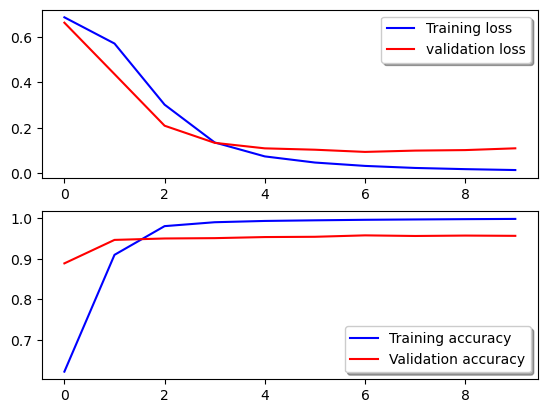

In [108]:
fig, ax = plt.subplots(2,1)
ax[0].plot(verify_model_history.history['loss'], color='b', label="Training loss")
ax[0].plot(verify_model_history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(verify_model_history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(verify_model_history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### Testing the model

In [109]:
# # Define a function to classify a given text as a correcr name  or incorrect name
# def verify_name(text):

#     new_name = Bow.transform([text]).toarray()
#     new_name = tfidf.transform(new_name).toarray()
#     # Make a prediction with the model
#     prediction = verify_model.predict(new_name)[0][0]
 
#     # Classify the prediction based on a threshold
#     if prediction > 0.5:
#         print(f"{text}  is a real name with high confidence")
#     else:
#         print(f"{text} is a real name with low confidence")

In [110]:
# # Define a function to classify a given text as a correcr name  or incorrect name
# def verify_name3(text):
#    names= text.split(" ")
#    pred=[]
#   #  fullname_score=0
#    for name in names:
#       new_name = Bow.transform([name]).toarray()
#       new_name = tfidf.transform(new_name).toarray()
#       #prediction with the model
#       prediction = verify_model.predict(new_name)[0][0]
#       pred.append(prediction)
#   #  for p,value in enumerate(pred):
#    if pred[0]>0.5:
#     print(f"{names[0]}  the first name is written in correct way")
#    else:
#     print(f"{names[0]}  the first name is written in Incorrect way")
#    if pred[1] >0.5:
#     print(f"{names[1]}  the second name is written in correct way")
#    else:
#     print(f"{names[1]}  the second name is written in Incorrect way")
#    if pred[2] >0.5:
#      print(f"{names[2]}  the third name is written in correct way")
#    else:
#     print(f"{names[2]}  the third name is written in Incorrect way")




#   # fullname_score+=prediction

#   # #  fullname_score = fullname_score.mean()
#   #  #first case is that the three names in the full name are correct 
#   #  if fullname_score > 0.6:
#   #    print(f"{text}  is a real name with high confidence")
#   #  #second case is that the one or two names in the full name are correct
#   #  elif fullname_score < 0.3 and fullname_score < 0.6:
#   #    print(f"{text} is a real name with low confidence")
#   #  #third case is that all three names in the full name are Incorrect
#   #  else: 
#   #    print(f"{text} is Incorrect name")


In [111]:
# Define a function to classify a given text as a correcr name  or incorrect name
def verify_name(text):
   names= text.split(" ")
   fullname_score=0
   for name in names:
      new_name = Bow.transform([name]).toarray()
      new_name = tfidf.transform(new_name).toarray()
      #prediction with the model
      prediction = verify_model.predict(new_name)[0][0]
      fullname_score+=prediction

   fullname_score = fullname_score.mean()
   #first case is that the three names in the full name are correct 
   if fullname_score >= 0.6:
     print(f"{text}  is a real name with high confidence")
   #second case is that the one or two names in the full name are correct
   elif fullname_score > 0.3 and fullname_score < 0.6:
     print(f"{text} is a real name with meduim confidence,at least one mae is correct")
   #third case is that all three names in the full name are Incorrect
   else: 
     print(f"{text} is a real name with low confidence / Incorrect name")

  



In [112]:
print(verify_name('نجيب مغيث سمير'))

1/1 [==============================] - 0s 26ms/step
نجيب مغيث سمير  is a real name with high confidence
None


In [96]:
print(verify_name('منة الله صلاح الدين محمد'))

1/1 [==============================] - 0s 29ms/step
منة الله صلاح الدين محمد  is a real name with high confidence
None


In [97]:
print(verify_name('ندي علي ضوي')) 

1/1 [==============================] - 0s 27ms/step
ندي علي ضوي  is a real name with high confidence
None


In [98]:
print(verify_name('باسم منتصر ندي'))

1/1 [==============================] - 0s 25ms/step
باسم منتصر ندي  is a real name with high confidence
None


In [99]:
print(verify_name('باسمم1 وحيد السيد'))

1/1 [==============================] - 0s 25ms/step
باسمم1 وحيد السيد is a real name with low confidence / Incorrect name
None


In [100]:
# Test the function on some example names

print(verify_name('باسمم وحد السد'))
print(verify_name('ندى احمد الكاشف')) #failed to verifiy the name
print(verify_name('نسي منضرى حلو'))
print(verify_name('باسم وحيد السيد')) 
print(verify_name('باسمم1 وحةد السد'))
print(verify_name('سوسن السيد عوض'))
print(verify_name('ضائ غلي وسمي'))
print(verify_name('منة الله صلاح الدين محمد'))
print(verify_name('محمود يحيي احمد'))
print(verify_name('يره عبحميد وسن'))
print(verify_name('باسمم وحةد السد'))
print(verify_name('حميل سوفي جملل'))
print(verify_name('خدي ويسف كملج'))
print(verify_name('هدي يوسف كمال'))

1/1 [==============================] - 0s 25ms/step
باسمم وحد السد is a real name with low confidence / Incorrect name
None
1/1 [==============================] - 0s 26ms/step
ندى احمد الكاشف is a real name with meduim confidence,at least one mae is correct
None
1/1 [==============================] - 0s 26ms/step
نسي منضرى حلو is a real name with low confidence / Incorrect name
None
1/1 [==============================] - 0s 28ms/step
باسم وحيد السيد  is a real name with high confidence
None
1/1 [==============================] - 0s 27ms/step
باسمم1 وحةد السد is a real name with low confidence / Incorrect name
None
1/1 [==============================] - 0s 27ms/step
سوسن السيد عوض  is a real name with high confidence
None
1/1 [==============================] - 0s 26ms/step
ضائ غلي وسمي is a real name with low confidence / Incorrect name
None
1/1 [==============================] - 0s 28ms/step
منة الله صلاح الدين محمد  is a real name with high confidence
None
1/1 [=======================

In [101]:
fake_examp =generate_fake_name("مصطفي محمود نوفل")
fake_examp

'ؤصطفي حمود نوةل'

In [102]:
for g in range(0,30):
  real_exam =generate_real_name(female_lst,male_lst,0)
  fake_examp =generate_fake_name(real_exam)
  print(verify_name(fake_examp))
  print(verify_name(real_exam))


1/1 [==============================] - 0s 28ms/step
بجي هبير بدالكريم is a real name with low confidence / Incorrect name
None
1/1 [==============================] - 0s 25ms/step
بجير هبيره عبدالكريم  is a real name with high confidence
None
1/1 [==============================] - 0s 25ms/step
مهسن فاخأ جله is a real name with low confidence / Incorrect name
None
1/1 [==============================] - 0s 27ms/step
محسن فاخر جبله  is a real name with high confidence
None
1/1 [==============================] - 0s 28ms/step
جبت نظي صيل is a real name with low confidence / Incorrect name
None
1/1 [==============================] - 0s 25ms/step
جبل نظير اصيل  is a real name with high confidence
None
1/1 [==============================] - 0s 26ms/step
اكهم شااد ضابده is a real name with low confidence / Incorrect name
None
1/1 [==============================] - 0s 25ms/step
ادهم شداد عابده  is a real name with high confidence
None
1/1 [==============================] - 0s 26ms/step
وعطاء ثصدي

### Save the model

In [103]:
# Save verification model in the h5 format to disk
verify_model.save('verification_model.h5')

In [104]:
# save the Bow vectorizer using joblib
dump(Bow, 'Bow_vectorizer.joblib')

['Bow_vectorizer.joblib']

In [105]:
# save the tfidf vectorizer using joblib
dump(tfidf, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']